## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5,3e-1,3e-2,3e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5 #動量改為0.5

## 使用nesterov，動量為0.5

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoc

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.2250 - acc: 0.1857 - val_loss: 2.1556 - val_acc: 0.2347
Epoch 2/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1107 - acc: 0.2580 - val_loss: 2.0695 - val_acc: 0.2738
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0372 - acc: 0.2886 - val_loss: 2.0102 - val_acc: 0.2888
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9843 - acc: 0.3073 - val_loss: 1.9629 - val_acc: 0.3169
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9441 - acc: 0.3199 - val_loss: 1.9294 - val_acc: 0.3222
Epoch 6/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.9122 - acc: 0.3304 - val_loss: 1.9009 - val_acc: 0.3355
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8853 - acc: 0.3383 - val_loss: 1.8782 - val_acc

50000/50000 [==============================] - 3s 50us/step - loss: 2.2621 - acc: 0.1556 - val_loss: 2.2491 - val_acc: 0.1702
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.2404 - acc: 0.1769 - val_loss: 2.2308 - val_acc: 0.1921
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.2236 - acc: 0.1899 - val_loss: 2.2153 - val_acc: 0.2042
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.2088 - acc: 0.1995 - val_loss: 2.2014 - val_acc: 0.2120
Epoch 6/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1954 - acc: 0.2092 - val_loss: 2.1886 - val_acc: 0.2185
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.1829 - acc: 0.2150 - val_loss: 2.1764 - val_acc: 0.2262
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.1709 - acc: 0.2232 - val_loss: 2.1646 - val_acc: 0.2313
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3512 - acc: 0.0883 - val_loss: 2.3439 - val_acc: 0.0937
Epoch 5/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3386 - acc: 0.0919 - val_loss: 2.3328 - val_acc: 0.0987
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3289 - acc: 0.0948 - val_loss: 2.3241 - val_acc: 0.1016
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.3211 - acc: 0.0982 - val_loss: 2.3169 - val_acc: 0.1044
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.3147 - acc: 0.1018 - val_loss: 2.3109 - val_acc: 0.1073
Epoch 9/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.3092 - acc: 0.1056 - val_loss: 2.3058 - val_acc: 0.1120
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3045 - acc: 0.1100 - val_loss: 2.3012 - val_acc: 0.1190
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [===========

50000/50000 [==============================] - 3s 52us/step - loss: 1.5343 - acc: 0.4573 - val_loss: 1.7547 - val_acc: 0.3514
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5039 - acc: 0.4661 - val_loss: 1.6171 - val_acc: 0.4194
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4692 - acc: 0.4801 - val_loss: 1.4912 - val_acc: 0.4664
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4366 - acc: 0.4908 - val_loss: 1.5372 - val_acc: 0.4463
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4128 - acc: 0.4999 - val_loss: 1.5250 - val_acc: 0.4531
Epoch 11/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3979 - acc: 0.5051 - val_loss: 1.5097 - val_acc: 0.4583
Epoch 12/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3634 - acc: 0.5186 - val_loss: 1.5030 - val_acc: 0.4600
Epoch 13/50
50000/50000 [========================

Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7160 - acc: 0.4025 - val_loss: 1.7197 - val_acc: 0.3942
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6960 - acc: 0.4092 - val_loss: 1.7166 - val_acc: 0.3955
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6786 - acc: 0.4135 - val_loss: 1.7145 - val_acc: 0.3903
Epoch 11/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6606 - acc: 0.4205 - val_loss: 1.6791 - val_acc: 0.4077
Epoch 12/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6461 - acc: 0.4263 - val_loss: 1.6554 - val_acc: 0.4190
Epoch 13/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6320 - acc: 0.4298 - val_loss: 1.6291 - val_acc: 0.4317
Epoch 14/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6179 - acc: 0.4358 - val_loss: 1.6301 - val_acc: 0.4277
Epoch 15/50
50000/50000 [===========

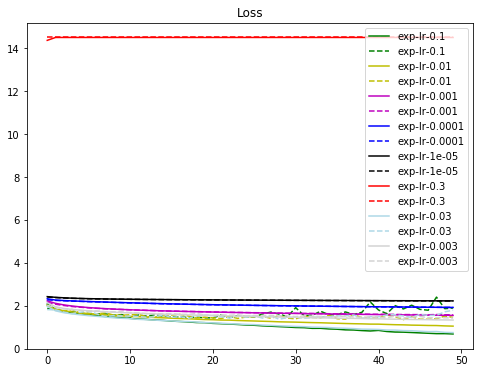

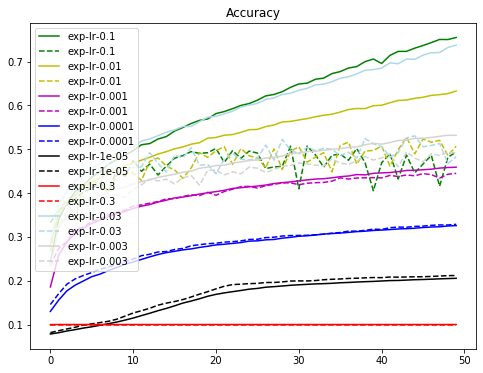

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g","y","m","b","k","r"ㄒ]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 不使用nesterov，動量為0.5

In [26]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9862 - acc: 0.2909 - val_loss: 1.8930 - val_acc: 0.3311
Epoch 2/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7987 - acc: 0.3675 - val_loss: 1.7684 - val_acc: 0.3638
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7249 - acc: 0.3918 - val_loss: 1.6925 - val_acc: 0.4048
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6687 - acc: 0.4151 - val_loss: 1.7368 - val_acc: 0.3965
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6267 - acc: 0.4280 - val_loss: 1.6032 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.5894 - acc: 0.4393 - val_loss: 1.6127 - val_acc: 0.4191
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5602 - acc: 0.4507 - val_loss: 1.5911 - val_acc

50000/50000 [==============================] - 2s 49us/step - loss: 2.0920 - acc: 0.2616 - val_loss: 2.0521 - val_acc: 0.2815
Epoch 3/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.0235 - acc: 0.2921 - val_loss: 1.9940 - val_acc: 0.3023
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9735 - acc: 0.3104 - val_loss: 1.9502 - val_acc: 0.3230
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9346 - acc: 0.3226 - val_loss: 1.9153 - val_acc: 0.3314
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9033 - acc: 0.3354 - val_loss: 1.8877 - val_acc: 0.3366
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8776 - acc: 0.3444 - val_loss: 1.8654 - val_acc: 0.3474
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8555 - acc: 0.3517 - val_loss: 1.8436 - val_acc: 0.3544
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.2398 - acc: 0.1916 - val_loss: 2.2302 - val_acc: 0.2033
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.2251 - acc: 0.2043 - val_loss: 2.2158 - val_acc: 0.2154
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.2113 - acc: 0.2153 - val_loss: 2.2022 - val_acc: 0.2262
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1982 - acc: 0.2235 - val_loss: 2.1895 - val_acc: 0.2347
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1859 - acc: 0.2304 - val_loss: 2.1775 - val_acc: 0.2414
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1743 - acc: 0.2372 - val_loss: 2.1664 - val_acc: 0.2447
Epoch 10/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1634 - acc: 0.2425 - val_loss: 2.1558 - val_acc: 0.2504
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 49us/step - loss: 2.3217 - acc: 0.1218 - val_loss: 2.3188 - val_acc: 0.1239
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3152 - acc: 0.1237 - val_loss: 2.3128 - val_acc: 0.1260
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3095 - acc: 0.1253 - val_loss: 2.3076 - val_acc: 0.1280
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.3045 - acc: 0.1270 - val_loss: 2.3029 - val_acc: 0.1306
Epoch 9/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.3001 - acc: 0.1293 - val_loss: 2.2987 - val_acc: 0.1325
Epoch 10/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.2961 - acc: 0.1324 - val_loss: 2.2949 - val_acc: 0.1353
Epoch 11/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.2924 - acc: 0.1351 - val_loss: 2.2915 - val_acc: 0.1366
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==========

50000/50000 [==============================] - 2s 50us/step - loss: 1.4692 - acc: 0.4778 - val_loss: 1.5234 - val_acc: 0.4562
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4443 - acc: 0.4873 - val_loss: 1.4793 - val_acc: 0.4739
Epoch 9/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.4065 - acc: 0.5006 - val_loss: 1.4532 - val_acc: 0.4726
Epoch 10/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.3852 - acc: 0.5097 - val_loss: 1.5878 - val_acc: 0.4351
Epoch 11/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.3627 - acc: 0.5160 - val_loss: 1.4064 - val_acc: 0.4946
Epoch 12/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.3366 - acc: 0.5251 - val_loss: 1.5632 - val_acc: 0.4370
Epoch 13/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3104 - acc: 0.5366 - val_loss: 1.4239 - val_acc: 0.4908
Epoch 14/50
50000/50000 [=======================

Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6844 - acc: 0.4129 - val_loss: 1.7006 - val_acc: 0.4033
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6663 - acc: 0.4182 - val_loss: 1.6991 - val_acc: 0.3944
Epoch 11/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6503 - acc: 0.4248 - val_loss: 1.6484 - val_acc: 0.4253
Epoch 12/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6338 - acc: 0.4288 - val_loss: 1.6408 - val_acc: 0.4266
Epoch 13/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.6207 - acc: 0.4349 - val_loss: 1.6209 - val_acc: 0.4339
Epoch 14/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6053 - acc: 0.4404 - val_loss: 1.6129 - val_acc: 0.4302
Epoch 15/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.5925 - acc: 0.4449 - val_loss: 1.5927 - val_acc: 0.4424
Epoch 16/50
50000/50000 [==========

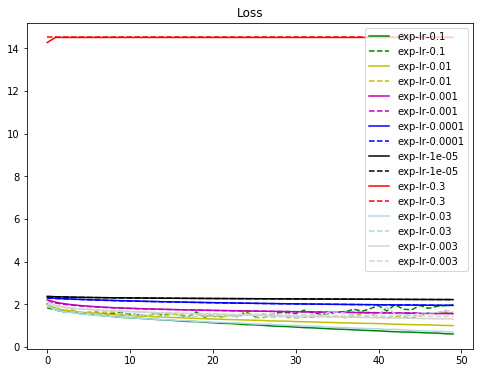

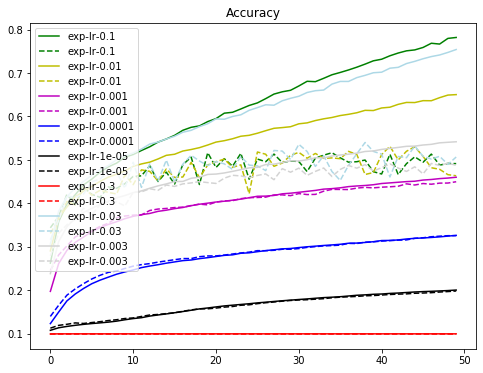

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g","y","m","b","k","r","#ADD8E6","#D3D3D3"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()